In [1]:
import pathlib
import csv

import matplotlib.pyplot as plt

Below is a method for extracting the valid condition names, replicate numbers, file names, and column headers for all of the data located at the directory specified in the path parameter. This can be used to, for example, replicate dictionary(map) style behavior and iterate over the valid "keys" of the dictionary.

In [2]:
def get_structures(path):
    C = []
    R = []
    F = []
    H = {}
    
    conditions = pathlib.Path(path).glob("*")
    for cond_i, condition in enumerate(conditions):
        c = str(condition).split("__")[0].split("/")[-1]
#         if c[0] != 'C': continue
        if 'C' not in c: continue # HACK! the previous line only works when there are no prefix on the cond names
        C.append(c)
        if cond_i == 0:
            replicates = condition.glob("*")
            for rep_i, replicate in enumerate(replicates):
                r = str(replicate).split("/")[-1]
                R.append(r)
                if rep_i == 0:
                    files = replicate.glob("*")
                    for file in files:
                        f = str(file).split("/")[-1].split(".")[0]
                        F.append(f)

                        with open(file, 'r') as dataFile:
                            csvReader = csv.reader(dataFile)
                            for row_i, row_d in enumerate(csvReader):
                                if row_i == 0:
                                    H[f] = row_d
                                    break
    return sorted(C),sorted(R),sorted(F),H


# C,R,F,H = get_structures("../Data/fitness_fns")
# print(C)
# print(R)
# print(F)
# print(H)

Below is a method for accessing data in a similar manner to a dictionary(map) but without loading all of the data into RAM. Instead, the file specified by path+condition+rep+file is loaded and the column specified is extracted and returned.

In [3]:
def get_data(path,cond,rep,file,column, no_cast=False): 
    data = []
    key = None
    
    files = pathlib.Path(path).glob("*{}*/{}/{}.csv".format(cond,rep,file)) # added * on front to be compatable
    files = [str(f) for f in files]
    if len(files) == 0:                                                           # with named jobs
#         print("ERROR: missing file at {} {} {} {}".format(path,cond,rep,file))
        return None
    file = files[0]                                       
    with open(file, 'r') as dataFile:
        csvReader = csv.reader(dataFile)
        for row_i, row_d in enumerate(csvReader):
            if row_i == 0:
                try:
                    key = row_d.index(column)
                except:
#                     print("ERROR: column \"{}\" doesn't exist in {}".format(column, file))
                    return None
                continue
            data.append(row_d[key])
    if no_cast:
        return data
    else:
        return list(map(float, data))

# test_x = get_data("../Data/fitness_fns","C00","101","pop","update")
# test_y = get_data("../Data/fitness_fns","C00","101","pop","score_AVE")

Below, the get_data() method is used to load the data necessary to plot each replicate of each condition in the ../Data/fitness_fns directory. From top to bottom, the number of traits is increasing from plot to plot; 1,2,4,8,16. From left to right, the length of the b-period is increasing; 0.25,0.5,0.75,1.0. Within each plot we are showing 50 replicate evolutionary runs. Each run is 100k generations long. Displayed for each replicate is the population average of "score".

shortest rep 1001 longest rep 1001
saving


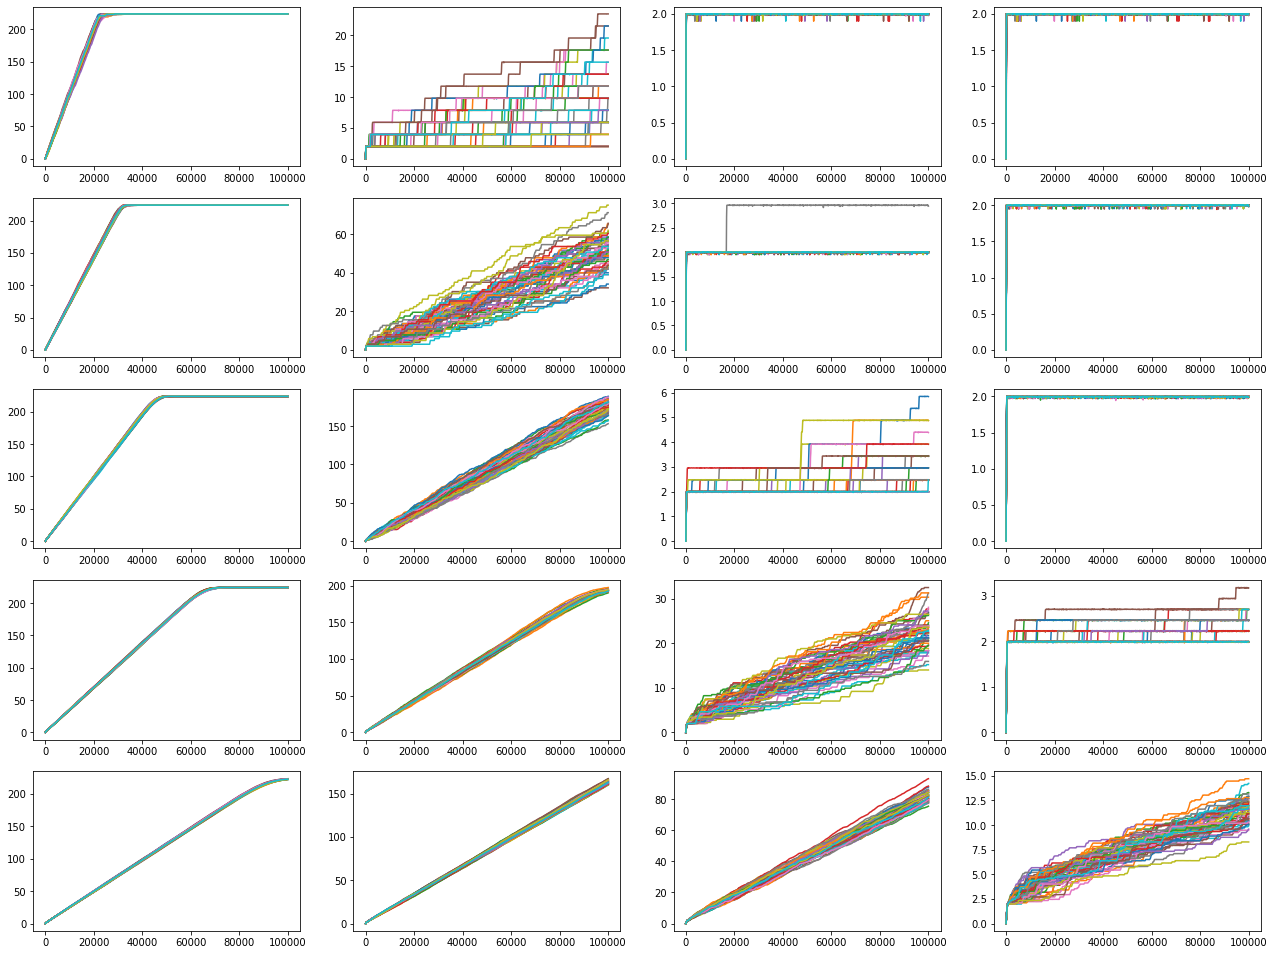

In [4]:
fig, axs = plt.subplots(5,4)
fig.set_size_inches(22, 17)
i = 0
j = 0
lens = []
for c in [str(x).zfill(2) for x in range(20)]:
    for r in range(101,151):
        x = get_data("../Data/fitness_fns","C{}".format(c),r,"LOD_data","update")
        y = get_data("../Data/fitness_fns","C{}".format(c),r,"LOD_data","score_AVE")
        lens.append(len(y))
        axs[j][i].plot(x, y)
#         axs[j][i].set_ylim(0,256)
    i += 1
    if i == 4:
        i = 0
        j += 1
print("shortest rep", min(lens), "longest rep", max(lens))
print("saving")
# plt.savefig("./FIGGIBOI.png")
plt.show()    

Below is identical code from that in the above pannel. The top row of plots show 1 trait while the bottom shows 1 6. Left to right is identical to above. Selection pressure in these plots is 16x stronger than the plots above.

shortest rep 1001 longest rep 1001
saving


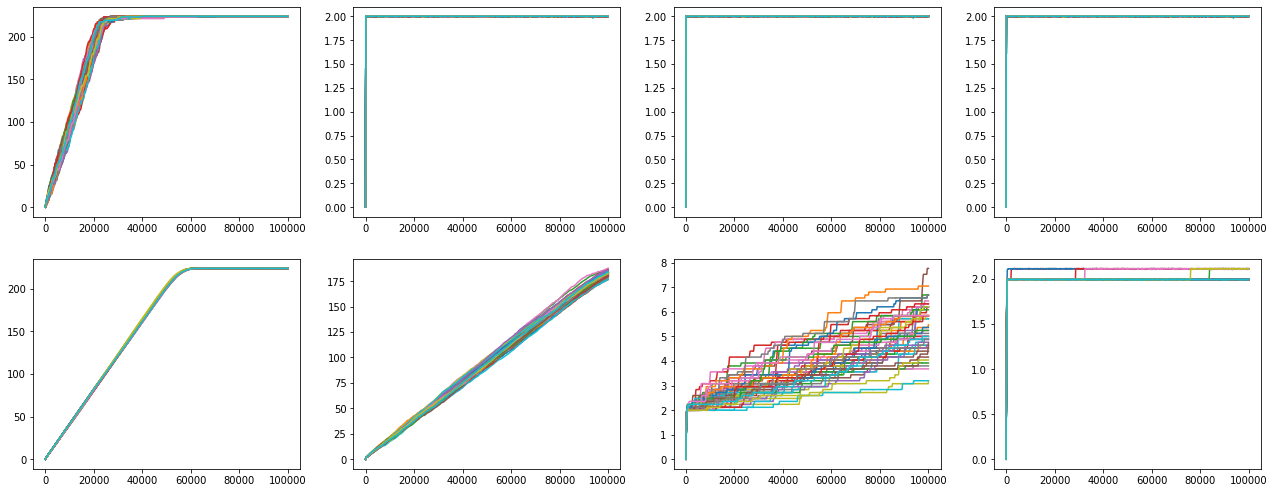

In [5]:
fig, axs = plt.subplots(2,4)
fig.set_size_inches(22, 8.5)
i = 0
j = 0
lens=[]
for c in [str(x).zfill(1) for x in range(8)]:
    for r in range(101,151):
        x = get_data("../Data/weak_16_a","C{}".format(c),r,"LOD_data","update")
        y = get_data("../Data/weak_16_a","C{}".format(c),r,"LOD_data","score_AVE")
        lens.append(len(y))
        axs[j][i].plot(x, y)
#         axs[j][i].set_ylim(0,256)
    i += 1
    if i == 4:
        i = 0
        j += 1
print("shortest rep", min(lens), "longest rep", max(lens))
print("saving")
# plt.savefig("./FIGGIBOI2.png")
plt.show()   

The code below compares reducing selection pressure by 16x vs increasing task count from 1 to 16. also with increasing population size by 16.

saving


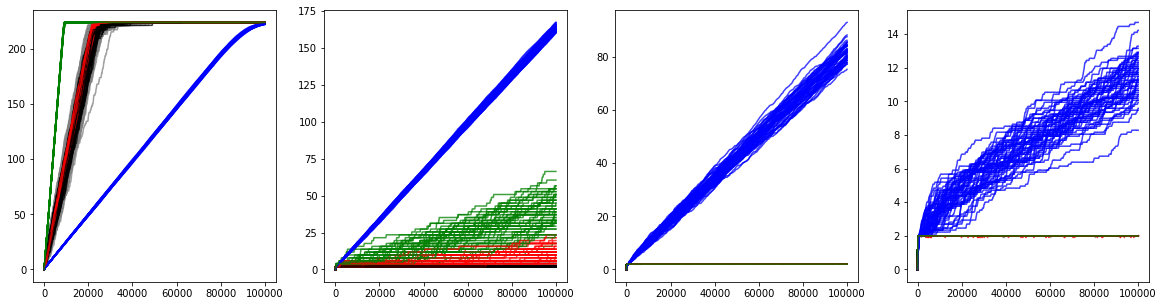

In [6]:
fig, axs = plt.subplots(1,4)
fig.set_size_inches(20, 5)

alpha = 0.75

for c in range(4):
    for r in range(151,601):
        #baseline (aditional reps, total = 16x)
        cc = str(c).zfill(1)
        x = get_data("../Data/more_reps","C{}".format(cc),r,"LOD_data","update")
        y = get_data("../Data/more_reps","C{}".format(cc),r,"LOD_data","score_AVE")
        axs[c].plot(x, y, color="grey",alpha=alpha)
        
    for r in range(101,151):
        #baseline
        cc = str(c).zfill(1)
        x = get_data("../Data/weak_16_a","C{}".format(cc),r,"LOD_data","update")
        y = get_data("../Data/weak_16_a","C{}".format(cc),r,"LOD_data","score_AVE")
        axs[c].plot(x, y, color="black",alpha=alpha)
        
        #weaker selection by 1/16
        cc = str(c).zfill(2)
        x = get_data("../Data/fitness_fns","C{}".format(cc),r,"LOD_data","update")
        y = get_data("../Data/fitness_fns","C{}".format(cc),r,"LOD_data","score_AVE")
        axs[c].plot(x, y,color="red",alpha=alpha)
        
        #16 traits
        cc = str(c+16).zfill(2)
        x = get_data("../Data/fitness_fns","C{}".format(cc),r,"LOD_data","update")
        y = get_data("../Data/fitness_fns","C{}".format(cc),r,"LOD_data","score_AVE")
        axs[c].plot(x, y,color="blue",alpha=alpha)
        
        #16x larger population
        cc = str(c).zfill(1)
        x = get_data("../Data/bigger_pop","C{}".format(cc),r,"LOD_data","update")
        y = get_data("../Data/bigger_pop","C{}".format(cc),r,"LOD_data","score_AVE")
        axs[c].plot(x, y, color="green",alpha=alpha)
        
#         axs[c].set_ylim(0,256)


print("saving")
# plt.savefig("./FIGGIBOI3.png")
plt.show()

saving


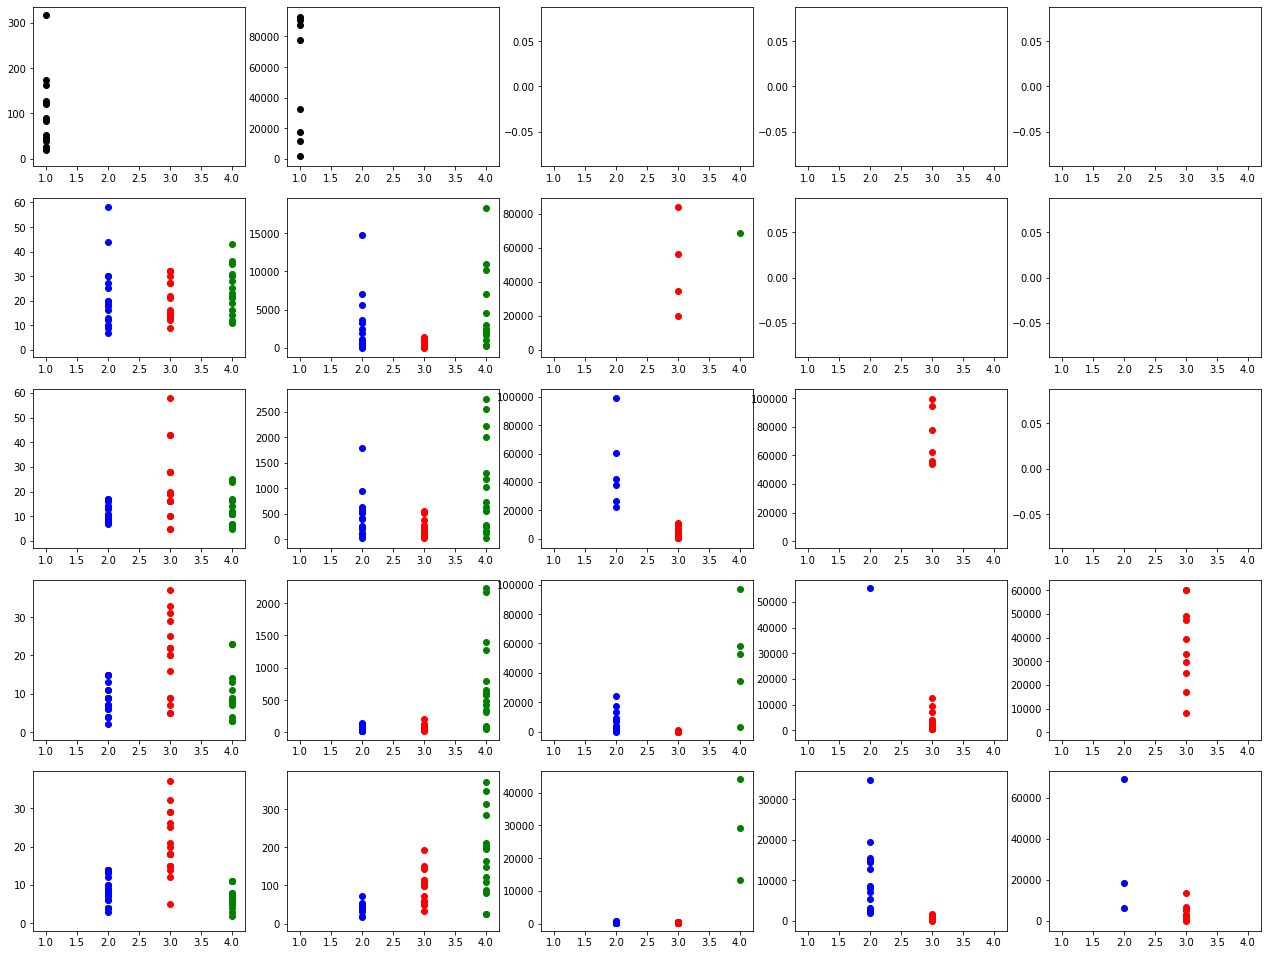

In [7]:
C,R,_,_ = get_structures("../Data/valley_cross")
fig, axs = plt.subplots(5,5)
fx = [1,2,3,4]#,1,2,3,4]
fy = [0,0,0,0]#,100000,100000,100000,100000]
for i in range(5):
    for j in range(5):
        axs[i][j].scatter(fx,fy,alpha=0)
fig.set_size_inches(22, 17)

for ci, c in enumerate(C):
    for r in R:
        y = get_data("../Data/valley_cross",c,r,"valley_cross_time","generation_of_cross")
        if not y is None:
            if ci < 5:
                x = [1 for _ in range(len(y))]
                axs[0][ci].scatter(x,y,color='black')
            elif ci < 9:
                x = [2 for _ in range(len(y))]
                axs[ci-4][0].scatter(x,y,color='blue')
            elif ci < 13:
                x = [2 for _ in range(len(y))]
                axs[ci-8][1].scatter(x,y,color='blue')
            elif ci < 17:
                x = [2 for _ in range(len(y))]
                axs[ci-12][2].scatter(x,y,color='blue')
            elif ci < 21:
                x = [2 for _ in range(len(y))]
                axs[ci-16][3].scatter(x,y,color='blue')
            elif ci < 25:
                x = [2 for _ in range(len(y))]
                axs[ci-20][4].scatter(x,y,color='blue')
            elif ci < 29:
                x = [3 for _ in range(len(y))]
                axs[ci-24][0].scatter(x,y,color='red')
            elif ci < 33:
                x = [3 for _ in range(len(y))]
                axs[ci-28][1].scatter(x,y,color='red')
            elif ci < 37:
                x = [3 for _ in range(len(y))]
                axs[ci-32][2].scatter(x,y,color='red')
            elif ci < 41:
                x = [3 for _ in range(len(y))]
                axs[ci-36][3].scatter(x,y,color='red')
            elif ci < 45:
                x = [3 for _ in range(len(y))]
                axs[ci-40][4].scatter(x,y,color='red')
            elif ci < 49:
                x = [4 for _ in range(len(y))]
                axs[ci-44][0].scatter(x,y,color='green')
            elif ci < 53:
                x = [4 for _ in range(len(y))]
                axs[ci-48][1].scatter(x,y,color='green')
            elif ci < 57:
                x = [4 for _ in range(len(y))]
                axs[ci-52][2].scatter(x,y,color='green')
            elif ci < 61:
                x = [4 for _ in range(len(y))]
                axs[ci-56][3].scatter(x,y,color='green')
            elif ci < 65:
                x = [4 for _ in range(len(y))]
                axs[ci-60][4].scatter(x,y,color='green')
print("saving")
# plt.savefig("./FIGGIBOI4.png")
plt.show()

saving


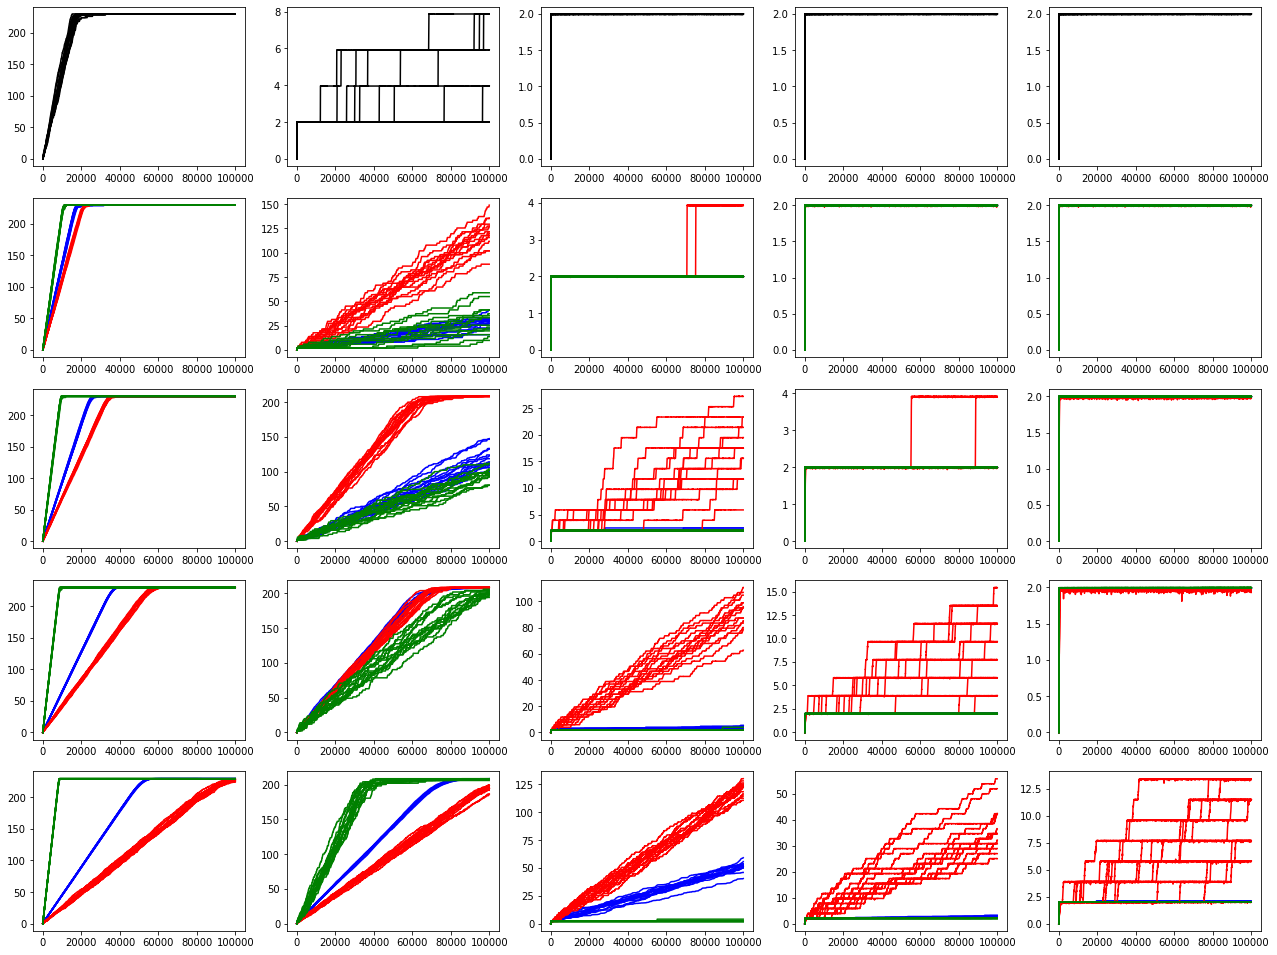

In [8]:
C,R,_,_ = get_structures("../Data/main_exp")
fig, axs = plt.subplots(5,5)
# fx = [1,2,3,4,1,2,3,4]
# fy = [0,0,0,0,100000,100000,100000,100000]
# for i in range(5):
#     for j in range(5):
#         axs[i][j].scatter(fx,fy,alpha=0)
fig.set_size_inches(22, 17)

for ci, c in enumerate(C):
#     if ci > 24: break
#     if ci > 44: break
#     print(c)
    for r in R:
        x = get_data("../Data/main_exp",c,r,"pop","update")
        y = get_data("../Data/main_exp",c,r,"pop","score_AVE")
        if not y is None:
            if ci < 5:
                axs[0][ci].plot(x,y,color='black')
            elif ci < 9:
                axs[ci-4][0].plot(x,y,color='blue')
            elif ci < 13:
                axs[ci-8][1].plot(x,y,color='blue')
            elif ci < 17:
                axs[ci-12][2].plot(x,y,color='blue')
            elif ci < 21:
                axs[ci-16][3].plot(x,y,color='blue')
            elif ci < 25:
                axs[ci-20][4].plot(x,y,color='blue')
            elif ci < 29:
                axs[ci-24][0].plot(x,y,color='red')
            elif ci < 33:
                axs[ci-28][1].plot(x,y,color='red')
            elif ci < 37:
                axs[ci-32][2].plot(x,y,color='red')
            elif ci < 41:
                axs[ci-36][3].plot(x,y,color='red')
            elif ci < 45:
                axs[ci-40][4].plot(x,y,color='red')
            elif ci < 49:
                axs[ci-44][0].plot(x,y,color='green')
            elif ci < 53:
                axs[ci-48][1].plot(x,y,color='green')
            elif ci < 57:
                axs[ci-52][2].plot(x,y,color='green')
            elif ci < 61:
                axs[ci-56][3].plot(x,y,color='green')
            elif ci < 65:
                axs[ci-60][4].plot(x,y,color='green')
print("saving")
# plt.savefig("./FIGGIBOI5.png")
plt.show()

In [9]:
def Fa(x):
    return x

def Fb(x):
    return -0.1*x

def C(x, la, lb):
    ca = 0
    cb = 0
    while x >= la+lb:
        ca += 1
        cb += 1
        x -= la+lb
    if x >= la:
        ca += 1
        x -= la
    return ca, cb, x

def F(x):
    la = 2
    lb = 0.5
    ca, cb, d = C(x, la, lb)
    if ca == cb:
        return Fa(ca*la + d) + Fb(cb*lb)
    else:
        return Fa(ca*la) + Fb(cb*lb + d)
    
print(F(256))

199.9


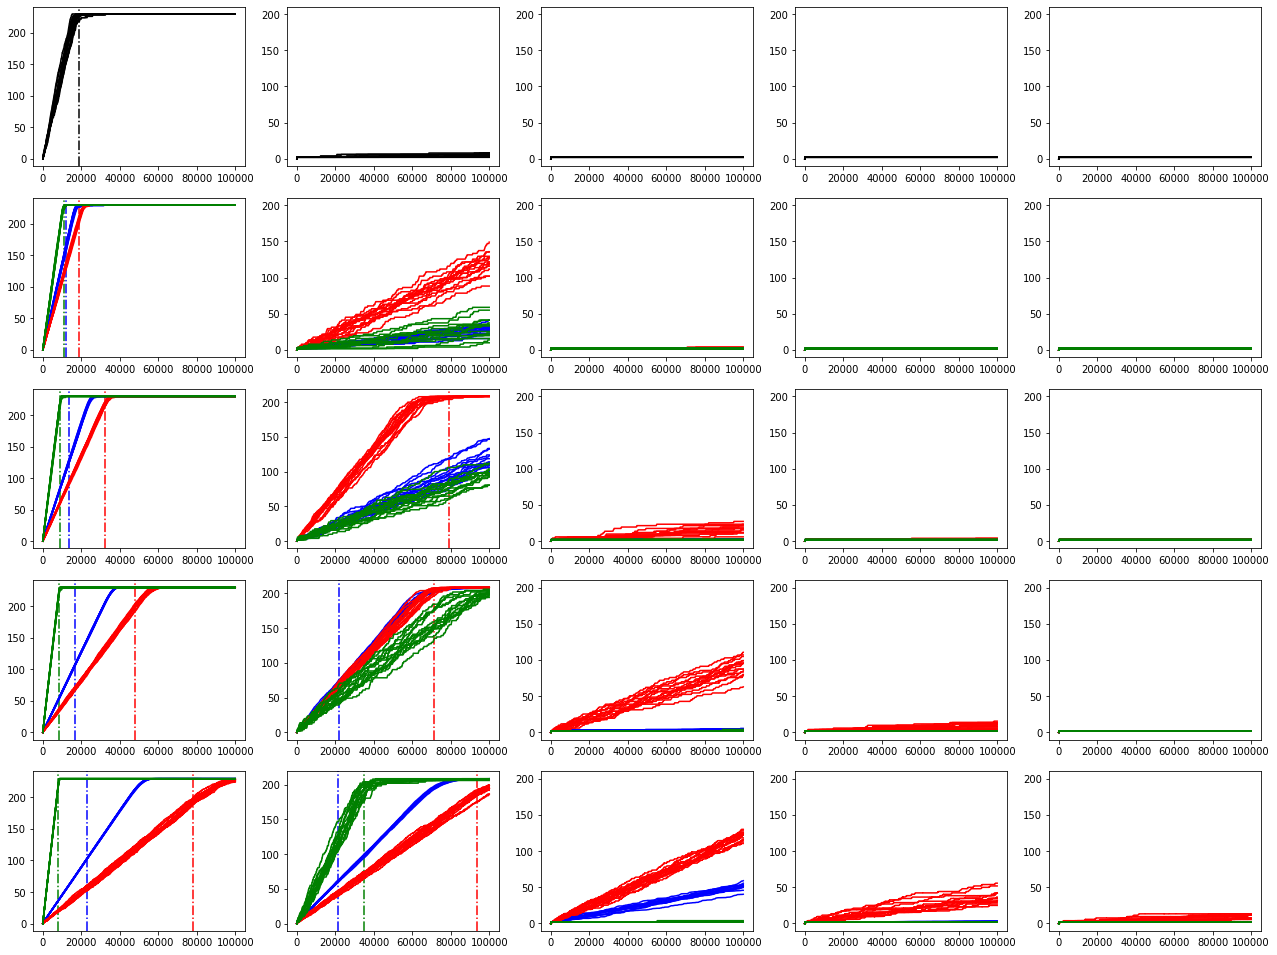

In [61]:
Cc,Rc,_,_ = get_structures("../Data/cross2")
fig, axs = plt.subplots(5,5)
fx = [0,100000]
fy = [0,200]
for i in range(5):
    for j in range(5):
        axs[i][j].scatter(fx,fy,alpha=0)
fig.set_size_inches(22, 17)

for ci in range(len(Cc)):
    data = []
    lb = 0
    lbh = [0.2,0.4,0.6,0.8,1.0]
    for r in Rc:
        
        yt = get_data("../Data/cross2",Cc[ci],r,"valley_cross_time"," top_time")#annoying space is needed before top_time
        yn = get_data("../Data/cross2",Cc[ci],r,"valley_cross_time"," trait_name", no_cast=True)#annoying space is needed before trait_name
        if not yt is None:
            ztn = zip(yt,yn)
            ztn = [t for t in ztn if t[0] != -1]
            if ztn:
                mtn = min(ztn, key=lambda x: x[0])
                data.append(mtn[0])
#                 peak_name = mtn[1]
#                 yb = get_data("../Data/cross2",Cc[ci],r,"valley_cross_time","bottom_time")
#                 zbn = zip(yb, yn)
#                 zbn = [b for b in zbn if b[1] == peak_name and b[0] != -1]
#                 mbn = max(zbn, key=lambda x: x[0])
#                 last_cross = mbn[0]
#                 data.append(last_cross)

            
    if data:
        a = sum(data)/len(data)
        #
        if ci < 5:
#             z = 199.9*a/(2-0.1*lbh[ci])
            z = (255*a)/(2+lbh[ci])
            if z <= 100000:axs[0][ci].axvline(z, color='black',linestyle="-.")
        elif ci < 9:
#             z = 199.9*a/(2-0.1*lbh[0])
            z = (255*a)/(2+lbh[0])
            if z <= 100000:axs[ci-4][0].axvline(z, color='blue',linestyle="-.")
        elif ci < 13:
#             z = 199.9*a/(2-0.1*lbh[1])
            z = (255*a)/(2+lbh[1])
            if z <= 100000:axs[ci-8][1].axvline(z, color='blue',linestyle="-.")
        elif ci < 17:
#             z = 199.9*a/(2-0.1*lbh[2])
            z = (255*a)/(2+lbh[2])
            if z <= 100000:axs[ci-12][2].axvline(z, color='blue',linestyle="-.")
        elif ci < 21:
#             z = 199.9*a/(2-0.1*lbh[3])
            z = (255*a)/(2+lbh[3])
            if z <= 100000:axs[ci-16][3].axvline(z, color='blue',linestyle="-.")
        elif ci < 25:
#             z = 199.9*a/(2-0.1*lbh[4])
            z = (255*a)/(2+lbh[4])
            if z <= 100000:axs[ci-20][4].axvline(z, color='blue',linestyle="-.")
        elif ci < 29:
#             z = 199.9*a/(2-0.1*lbh[0])
            z = (255*a)/(2+lbh[0])
            if z <= 100000:axs[ci-24][0].axvline(z, color='red',linestyle="-.")
        elif ci < 33:
#             z = 199.9*a/(2-0.1*lbh[1])
            z = (255*a)/(2+lbh[1])
            if z <= 100000:axs[ci-28][1].axvline(z, color='red',linestyle="-.")
        elif ci < 37:
#             z = 199.9*a/(2-0.1*lbh[2])
            z = (255*a)/(2+lbh[2])
            if z <= 100000:axs[ci-32][2].axvline(z, color='red',linestyle="-.")
        elif ci < 41:
#             z = 199.9*a/(2-0.1*lbh[3])
            z = (255*a)/(2+lbh[3])
            if z <= 100000:axs[ci-36][3].axvline(z, color='red',linestyle="-.")
        elif ci < 45:
#             z = 199.9*a/(2-0.1*lbh[4])
            z = (255*a)/(2+lbh[4])
            if z <= 100000:axs[ci-40][4].axvline(z, color='red',linestyle="-.")
        elif ci < 49:
#             z = 199.9*a/(2-0.1*lbh[0])
            z = (255*a)/(2+lbh[0])
            if z <= 100000:axs[ci-44][0].axvline(z, color='green',linestyle="-.")
        elif ci < 53:
#             z = 199.9*a/(2-0.1*lbh[1])
            z = (255*a)/(2+lbh[1])
            if z <= 100000:axs[ci-48][1].axvline(z, color='green',linestyle="-.")
        elif ci < 57:
#             z = 199.9*a/(2-0.1*lbh[2])
            z = (255*a)/(2+lbh[2])
            if z <= 100000:axs[ci-52][2].axvline(z, color='green',linestyle="-.")
        elif ci < 61:
#             z = 199.9*a/(2-0.1*lbh[3])
            z = (255*a)/(2+lbh[3])
            if z <= 100000:axs[ci-56][3].axvline(z, color='green',linestyle="-.")
        elif ci < 65:
#             z = 199.9*a/(2-0.1*lbh[4])
            z = (255*a)/(2+lbh[4])
            if z <= 100000:axs[ci-60][4].axvline(z, color='green',linestyle="-.")
        
Cm,Rm,_,_ = get_structures("../Data/main_exp")

for ci, c in enumerate(Cm):
#     if ci > 24: break
#     if ci > 44: break
#     print(c)
    for r in Rm:
        x = get_data("../Data/main_exp",c,r,"pop","update")
        y = get_data("../Data/main_exp",c,r,"pop","score_AVE")
        if not y is None:
            if ci < 5:
                axs[0][ci].plot(x,y,color='black')
            elif ci < 9:
                axs[ci-4][0].plot(x,y,color='blue')
            elif ci < 13:
                axs[ci-8][1].plot(x,y,color='blue')
            elif ci < 17:
                axs[ci-12][2].plot(x,y,color='blue')
            elif ci < 21:
                axs[ci-16][3].plot(x,y,color='blue')
            elif ci < 25:
                axs[ci-20][4].plot(x,y,color='blue')
            elif ci < 29:
                axs[ci-24][0].plot(x,y,color='red')
            elif ci < 33:
                axs[ci-28][1].plot(x,y,color='red')
            elif ci < 37:
                axs[ci-32][2].plot(x,y,color='red')
            elif ci < 41:
                axs[ci-36][3].plot(x,y,color='red')
            elif ci < 45:
                axs[ci-40][4].plot(x,y,color='red')
            elif ci < 49:
                axs[ci-44][0].plot(x,y,color='green')
            elif ci < 53:
                axs[ci-48][1].plot(x,y,color='green')
            elif ci < 57:
                axs[ci-52][2].plot(x,y,color='green')
            elif ci < 61:
                axs[ci-56][3].plot(x,y,color='green')
            elif ci < 65:
                axs[ci-60][4].plot(x,y,color='green')
plt.show()

saving


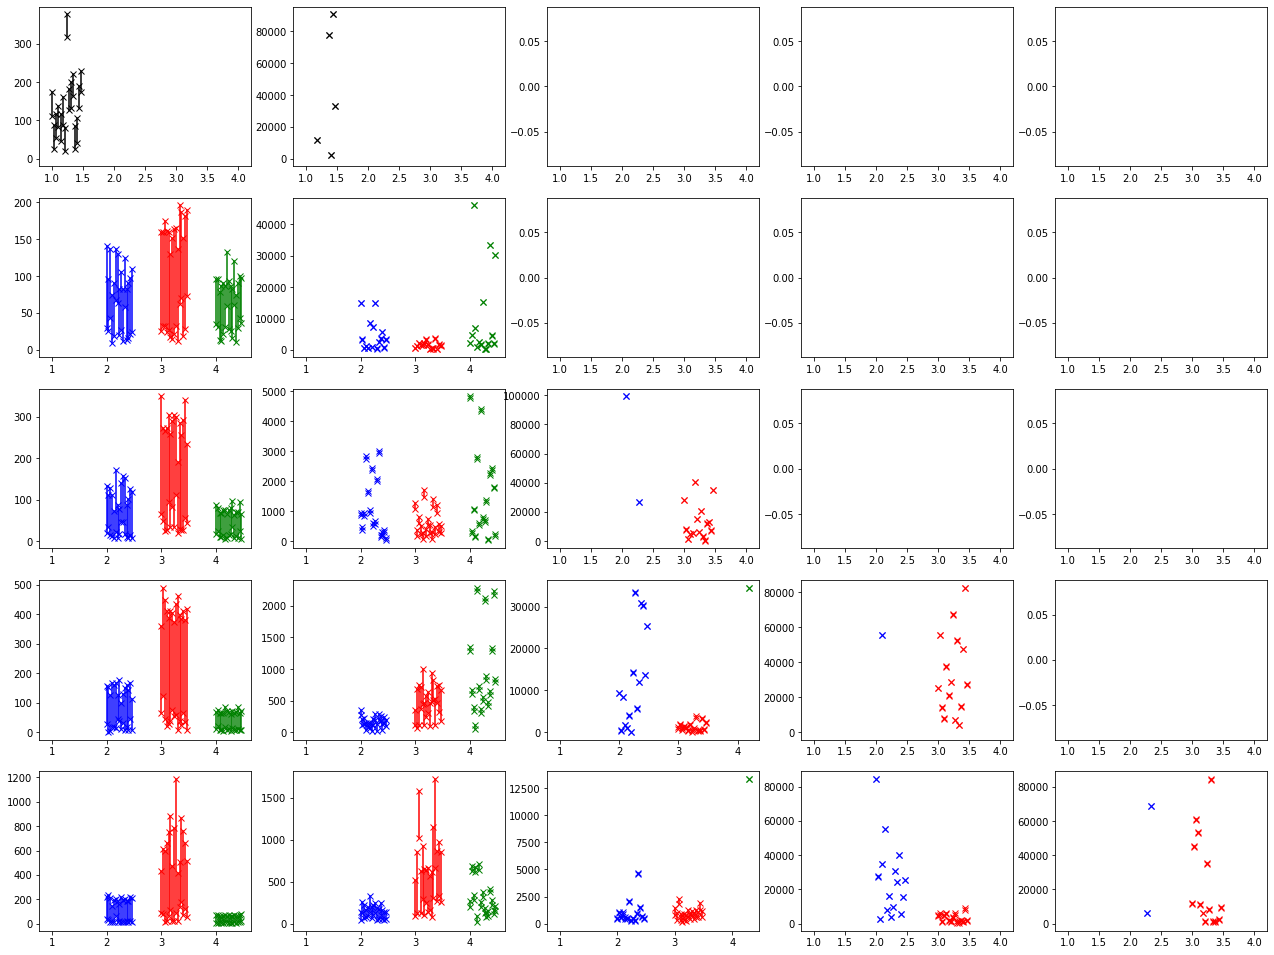

In [11]:
Cc,Rc,Fc,Hc = get_structures("../Data/cross2")

fig, axs = plt.subplots(5,5)

fx = [1,2,3,4]#,1,2,3,4]
fy = [0,0,0,0]#,100000,100000,100000,100000]
for i in range(5):
    for j in range(5):
        axs[i][j].scatter(fx,fy,alpha=0)


fig.set_size_inches(22, 17)
mstr="x"

for ci in range(len(Cc)):
    for ri,r in enumerate(Rc):
        delta = ri/(2*len(Rc))
        yt = get_data("../Data/cross2",Cc[ci],r,"valley_cross_time"," top_time")#annoying space is needed before top_time
        yn = get_data("../Data/cross2",Cc[ci],r,"valley_cross_time"," trait_name", no_cast=True)#annoying space is needed before trait_name
        y = None
        if not yt is None:
            ztn = zip(yt,yn)
            ztn = [t for t in ztn if t[0] != -1]
            if ztn:
                mtn = min(ztn, key=lambda x: x[0])
                peak_name = mtn[1]
                yb = get_data("../Data/cross2",Cc[ci],r,"valley_cross_time","bottom_time")
                zbn = zip(yb, yn)
                zbn = [b for b in zbn if b[1] == peak_name and b[0] != -1]
                mbn = max(zbn, key=lambda x: x[0])
                last_cross = mbn[0]
                y = [last_cross, mtn[0]]
                
        if not y is None:
#             if ci < 45: pass
            if ci < 5:
                x = [1+delta for _ in range(len(y))]
                axs[0][ci].plot(x,y,color='black',marker=mstr)
            elif ci < 9:
                x = [2+delta for _ in range(len(y))]
                axs[ci-4][0].plot(x,y,color='blue',marker=mstr)
            elif ci < 13:
                x = [2+delta for _ in range(len(y))]
                axs[ci-8][1].plot(x,y,color='blue',marker=mstr)
            elif ci < 17:
                x = [2+delta for _ in range(len(y))]
                axs[ci-12][2].plot(x,y,color='blue',marker=mstr)
            elif ci < 21:
                x = [2+delta for _ in range(len(y))]
                axs[ci-16][3].plot(x,y,color='blue',marker=mstr)
            elif ci < 25:
                x = [2+delta for _ in range(len(y))]
                axs[ci-20][4].plot(x,y,color='blue',marker=mstr)
            elif ci < 29:
                x = [3+delta for _ in range(len(y))]
                axs[ci-24][0].plot(x,y,color='red',marker=mstr)
            elif ci < 33:
                x = [3+delta for _ in range(len(y))]
                axs[ci-28][1].plot(x,y,color='red',marker=mstr)
            elif ci < 37:
                x = [3+delta for _ in range(len(y))]
                axs[ci-32][2].plot(x,y,color='red',marker=mstr)
            elif ci < 41:
                x = [3+delta for _ in range(len(y))]
                axs[ci-36][3].plot(x,y,color='red',marker=mstr)
            elif ci < 45:
                x = [3+delta for _ in range(len(y))]
                axs[ci-40][4].plot(x,y,color='red',marker=mstr)
            elif ci < 49:
                x = [4+delta for _ in range(len(y))]
                axs[ci-44][0].plot(x,y,color='green',marker=mstr)
            elif ci < 53:
                x = [4+delta for _ in range(len(y))]
                axs[ci-48][1].plot(x,y,color='green',marker=mstr)
            elif ci < 57:
                x = [4+delta for _ in range(len(y))]
                axs[ci-52][2].plot(x,y,color='green',marker=mstr)
            elif ci < 61:
                x = [4+delta for _ in range(len(y))]
                axs[ci-56][3].plot(x,y,color='green',marker=mstr)
            elif ci < 65:
                x = [4+delta for _ in range(len(y))]
                axs[ci-60][4].plot(x,y,color='green',marker=mstr)
print("saving")
plt.show()

COND main_exp_C05
229.49999999999997


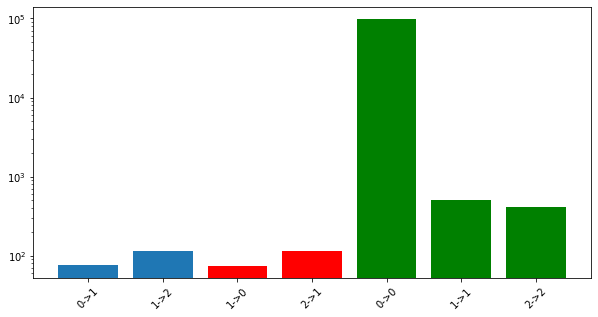

COND main_exp_C06
229.49999999999997


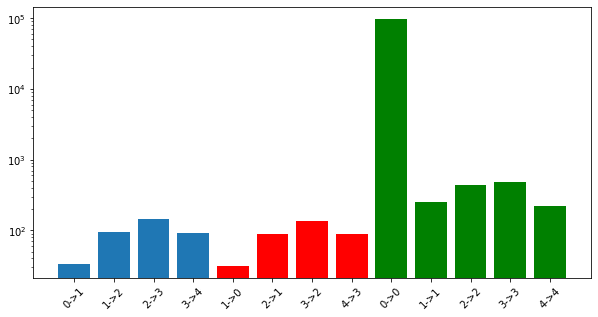

COND main_exp_C07
229.49999999999997


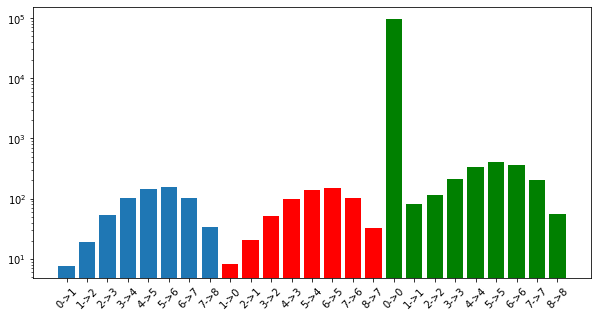

COND main_exp_C08
229.49999999999997


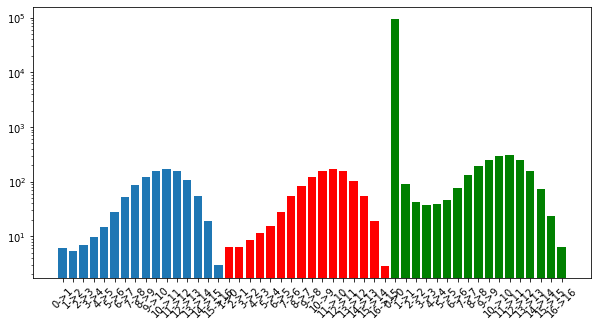

COND main_exp_C09
210.375


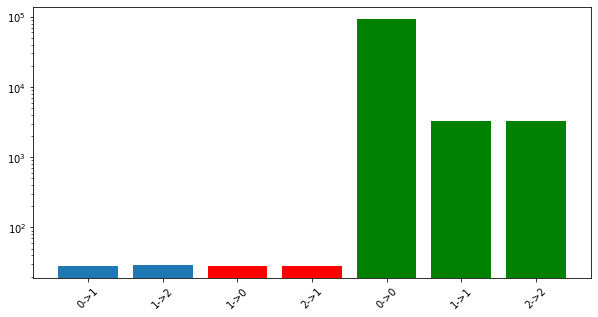

COND main_exp_C10
210.375


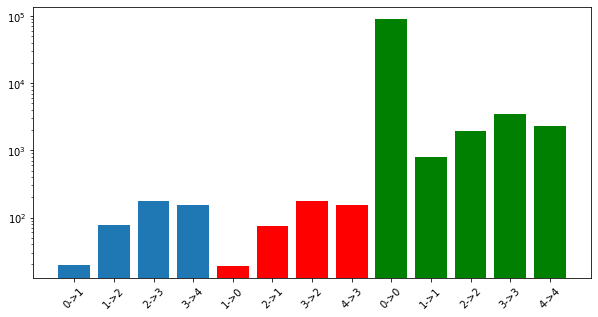

COND main_exp_C11
210.375


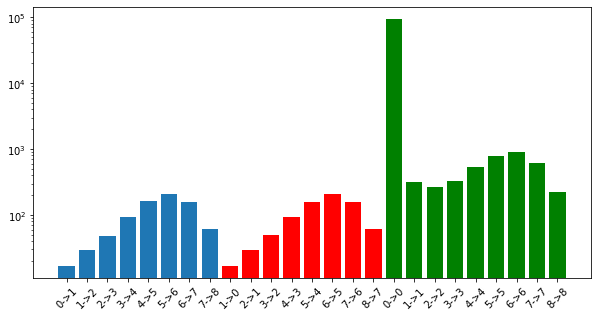

COND main_exp_C12
210.375


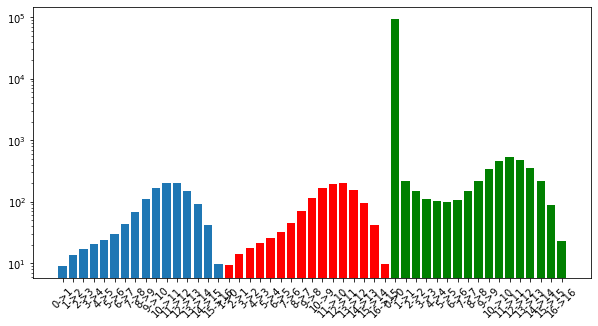

COND main_exp_C13
194.19230769230768


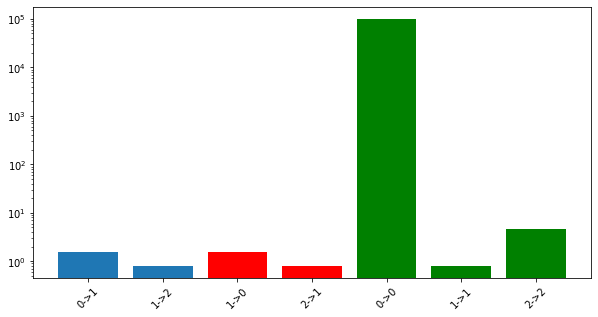

COND main_exp_C14
194.19230769230768


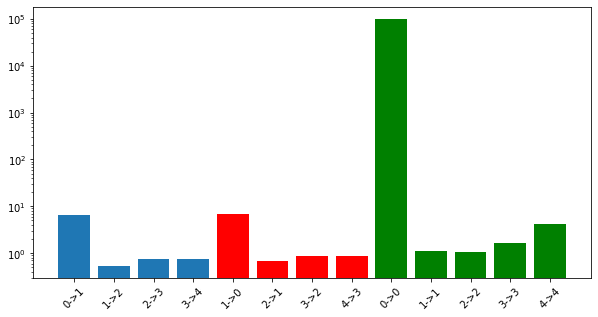

COND main_exp_C15
194.19230769230768


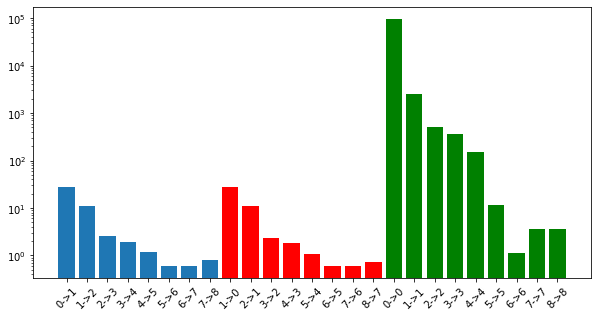

COND main_exp_C16
194.19230769230768


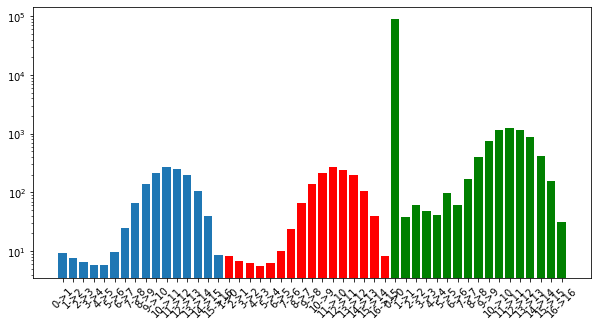

COND main_exp_C17
180.32142857142858


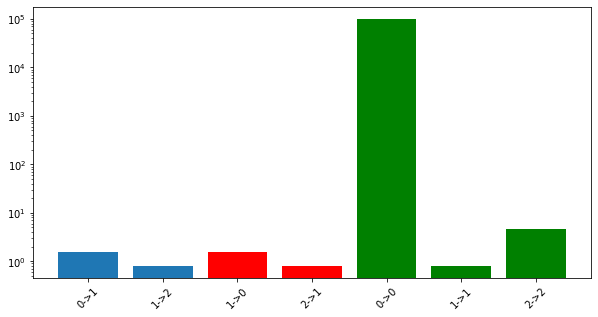

COND main_exp_C18
180.32142857142858


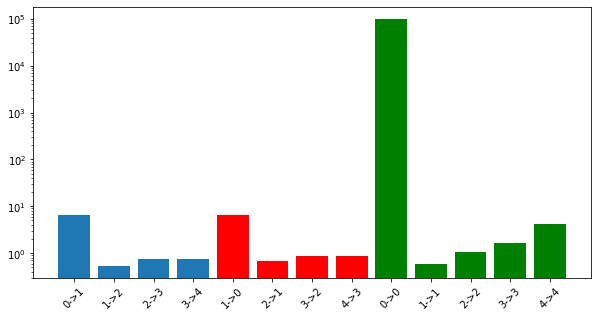

COND main_exp_C19
180.32142857142858


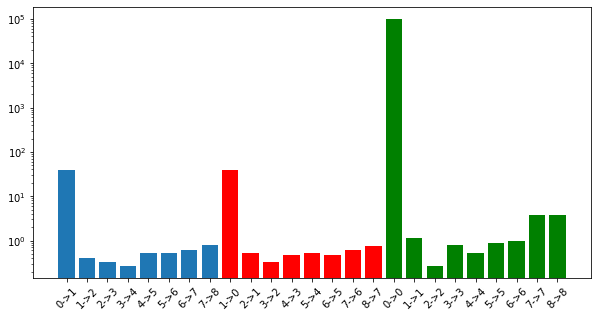

COND main_exp_C20
180.32142857142858


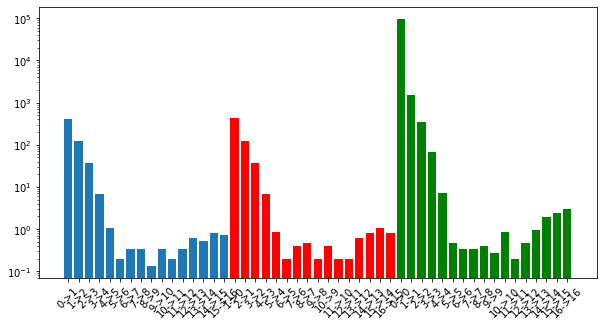

COND main_exp_C21
168.29999999999998


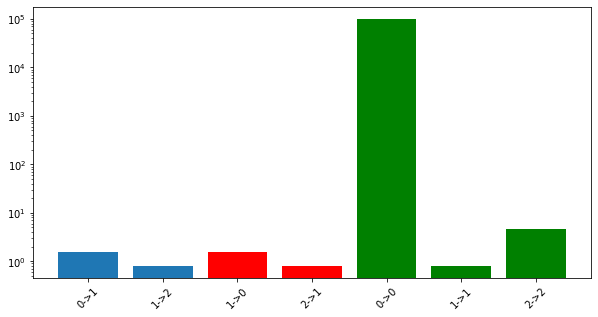

COND main_exp_C22
168.29999999999998


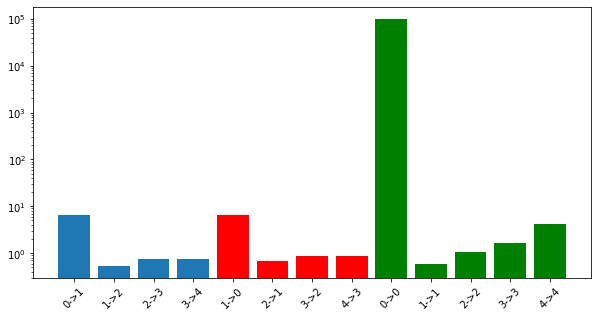

COND main_exp_C23
168.29999999999998


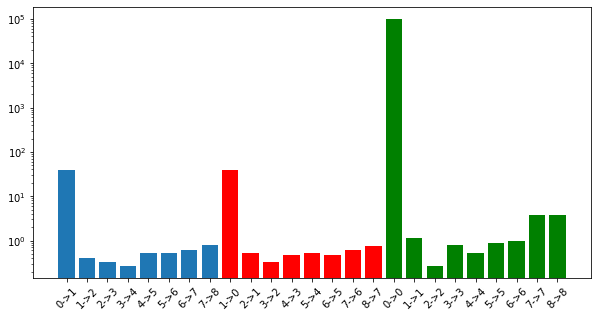

COND main_exp_C24
168.29999999999998


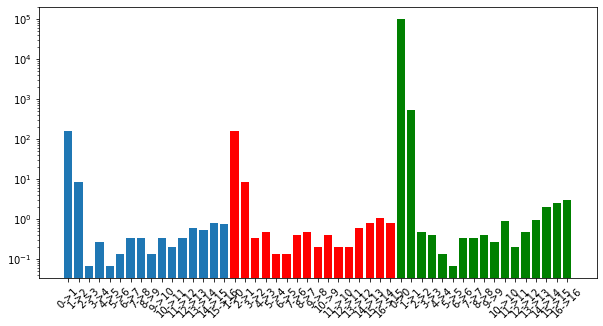

In [63]:
Cm,Rm,_,_ = get_structures("../Data/main_exp")

la = 2
lb = 0.2
GENS = 100000

for ci, c in enumerate(Cm):
    if ci < 5 or ci > 24: continue
    print("COND", c)
    if ci < 5:
        z = (255*(la-(0.1*lb)))/(la+lbh[ci])
    elif ci < 9:
        z = (255*(la-(0.1*lb)))/(la+lbh[0])
    elif ci < 13:
        z = (255*(la-(0.1*lb)))/(la+lbh[1])
    elif ci < 17:
        z = (255*(la-(0.1*lb)))/(la+lbh[2])
    elif ci < 21:
        z = (255*(la-(0.1*lb)))/(la+lbh[3])
    elif ci < 25:
        z = (255*(la-(0.1*lb)))/(la+lbh[4])
    elif ci < 29:
        z = (255*(la-(0.1*lb)))/(la+lbh[0])
    elif ci < 33:
        z = (255*(la-(0.1*lb)))/(la+lbh[1])
    elif ci < 37:
        z = (255*(la-(0.1*lb)))/(la+lbh[2])
    elif ci < 41:
        z = (255*(la-(0.1*lb)))/(la+lbh[3])
    elif ci < 45:
        z = (255*(la-(0.1*lb)))/(la+lbh[4])
    elif ci < 49:
        z = (255*(la-(0.1*lb)))/(la+lbh[0])
    elif ci < 53:
        z = (255*(la-(0.1*lb)))/(la+lbh[1])
    elif ci < 57:
        z = (255*(la-(0.1*lb)))/(la+lbh[2])
    elif ci < 61:
        z = (255*(la-(0.1*lb)))/(la+lbh[3])
    elif ci < 65:
        z = (255*(la-(0.1*lb)))/(la+lbh[4])
    print(z)
    
#     if ci > 24: break
#     if ci > 44: break
#     print(c)
    holds_all_reps = []
    for r in Rm:
#         print("REP", r)
        allNames = []
        names = []
        ascent_counts = [0 for _ in range(GENS)] #hard coded to generations
        for name in ["A::", "B::", "C::", "D::", "E::", "F::","G::","H::","I::","J::","K::","L::","M::","N::","O::","P::","Q::","R::","S::","T::","U::","V::","W::","X::","Y::","Z::"]:
#             x = get_data("../Data/main_exp",c,r,"LOD_data","update")
            y = get_data("../Data/main_exp",c,r,"LOD_data",name+"mean_AVE")
            if not y is None:
                names.append(name)
                allNames.append(y)
            
        test = zip(*allNames) #nicely puts each update side-by-side so all traits are together in one line
        for u, update in enumerate(test):
            l =  len(update)
            for i in range(l):
                ca, cb, d = C(update[i], la, lb)
                if ca == cb and d > 0.5 and update[i] < z-10:# threshold and pre-max 
                    ascent_counts[u] += 1
        transition_counts = {}      
        for h in range(1,len(ascent_counts)):
            prev = ascent_counts[h-1]
            curr = ascent_counts[h]
            key = str(prev)+"->"+str(curr)
            if not key in transition_counts:
                transition_counts[key] = 1
            else:
                transition_counts[key] += 1
                
#         for key in transition_counts:
#             transition_counts[key] /= GENS
        holds_all_reps.append(transition_counts)
    cond_average_transitions = {}
    for rep_data in holds_all_reps:
        for key in rep_data:
            if key in cond_average_transitions:
                cond_average_transitions[key] += rep_data[key]
            else:
                cond_average_transitions[key] = rep_data[key]
    
    for key in cond_average_transitions:
            cond_average_transitions[key] /= len(Rm)
            
    plot_names = []
    plot_data = []
    for key in sorted(cond_average_transitions, key=lambda x: int(x.split("->")[0])):
        if key in ["0->1","1->2","2->3","3->4","4->5","5->6","6->7","7->8","8->9","9->10","10->11","11->12","12->13","13->14","14->15","15->16"]:
            plot_data.append(cond_average_transitions[key])
            plot_names.append(key)
    plt.figure(figsize=(10,5))
    plt.bar(plot_names,plot_data)
#     plt.yscale("log")
#     plt.show()
    
    plot_names = []
    plot_data = []
    for key in sorted(cond_average_transitions, key=lambda x: int(x.split("->")[0])):
        if key in ["1->0","2->1","3->2","4->3","5->4","6->5","7->6","8->7","9->8","10->9","11->10","12->11","13->12","14->13","15->14","16->15"]:
            plot_data.append(cond_average_transitions[key])
            plot_names.append(key)
#     plt.figure(figsize=(10,5))
    plt.bar(plot_names,plot_data, color="red")
    
    plot_names = []
    plot_data = []
    for key in sorted(cond_average_transitions, key=lambda x: int(x.split("->")[0])):
        if key in ["0->0","1->1","2->2","3->3","4->4","5->5","6->6","7->7","8->8","9->9","10->10","11->11","12->12","13->13","14->14","15->15","16->16"]:
            plot_data.append(cond_average_transitions[key])
            plot_names.append(key)
#     plt.figure(figsize=(10,5))
    plt.bar(plot_names,plot_data, color="green")
    
    plt.xticks(rotation=45)
    plt.yscale("log")
    plt.show()
    